In [12]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
import wave

In [13]:

def list_to_wav(data, filename, sample_rate=44100):
    # Ensure data is a numpy array
    data = np.array(data, dtype=np.int16)
    # Create a wave file
    with wave.open(filename, 'w') as wav_file:
        # Set parameters: 1 channel, 2 bytes per sample, sample rate
        wav_file.setnchannels(1)
        wav_file.setsampwidth(2)
        wav_file.setframerate(sample_rate)

        # Write data to the wave file
        wav_file.writeframes(data.tobytes())


The below cell models the undamped harmonic oscillator. For solutions to the differential equations or more background see Introduction to Mechanics by Kleppner and Kolenkow CH 11

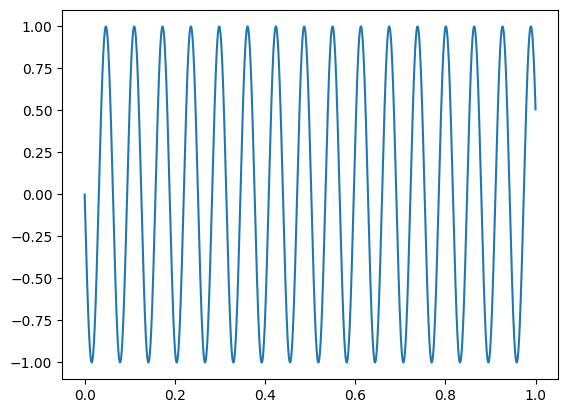

In [14]:
fs = 10000
t = np.linspace(0, 1, fs)

#parameters
k = 1000
m = 0.1
w0 = np.sqrt(k/m)
f0 = w0/(2*np.pi)  # ~15Hz

#initial conditions
X0 = 1
phi0 = np.pi/2

x = X0*np.cos(w0*t+phi0)

plt.plot(t, x)

Below light damping is added

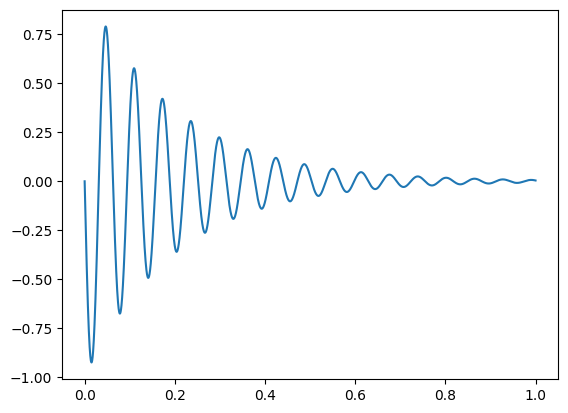

In [15]:
fs = 10000
t = np.linspace(0, 1, fs)

#fundamental parameters
k = 1000
m = 0.1
b = 1

#secondary characteristics
w0 = np.sqrt(k/m)
f0 = w0/(2*np.pi)  # ~15.9Hz
gamma = b/m
w1 = np.sqrt(w0**2-(gamma/2)**2)
f1 = w1/(2*np.pi) # ~13.7Hz
alpha = (-gamma/2)
Q = w0/gamma


#initial conditions
X0 = 1
phi0 = np.pi/2

x = X0*np.exp(alpha*t)*np.cos(w1*t+phi0)

plt.plot(t, x)

In [16]:
print(alpha)

-5.0


Below a parametric oscillator is employed by changing the spring tension with a seperate envelope.

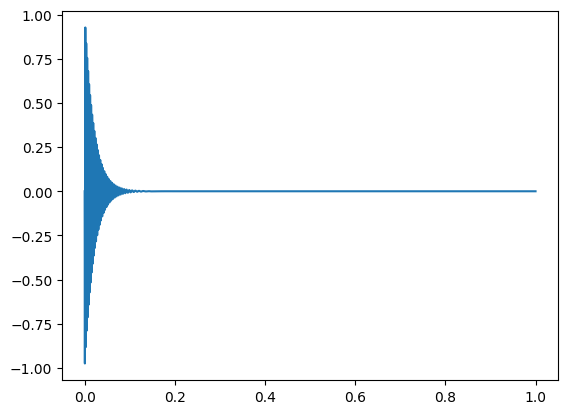

In [17]:
fs = 10000
t = np.linspace(0, 1, fs)
kenv = np.exp(-10*t)

#fundamental parameters
k = 100000 * kenv + 1000
m = 0.01
b = 1

#secondary characteristics
w0 = np.sqrt(k/m)
f0 = w0/(2*np.pi)  # ~15.9Hz
gamma = b/m
w1 = np.sqrt(w0**2-(gamma/2)**2)
f1 = w1/(2*np.pi) # ~13.7Hz
alpha = (-gamma/2)
Q = w0/gamma


#initial conditions
X0 = 1
phi0 = np.pi/2

x = X0*np.exp(alpha*t)*np.cos(w1*t+phi0)

plt.plot(t, x)

In [18]:
list_to_wav(x, 'output.wav')

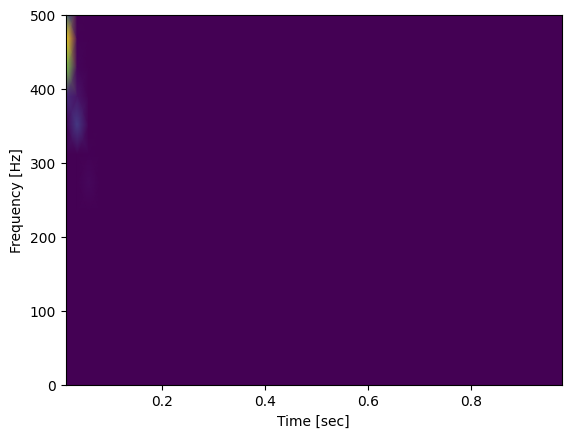

In [19]:
f, t, Sxx = signal.spectrogram(x, fs)

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim(0,500)

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()